# SURPRISE HOUSING-ASSIGNMENT

## Importing all the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#To scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)


%matplotlib inline

# Data understanding and Exploration

In [2]:
# Reading dataset
housing = pd.read_csv("D:\mca\pg\Surprise_housing/train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# checking for null values
missing = (housing.isnull().sum()/housing.isnull().count()*100).sort_values(ascending=False)
missing.head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Id               0.000000
dtype: float64

In [4]:
# Fixing missing values
housing.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)


In [5]:
housing[['LotFrontage','MasVnrArea','GarageYrBlt']].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [6]:
#Replacing missing values
#There are outlier so using median and mean seems stable too.
housing['LotFrontage'] = housing.LotFrontage.fillna(housing.LotFrontage.median())
housing['MasVnrArea'] = housing.MasVnrArea.fillna(housing.MasVnrArea.median())
housing['GarageYrBlt'] = housing.GarageYrBlt.fillna(housing.GarageYrBlt.mean())

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

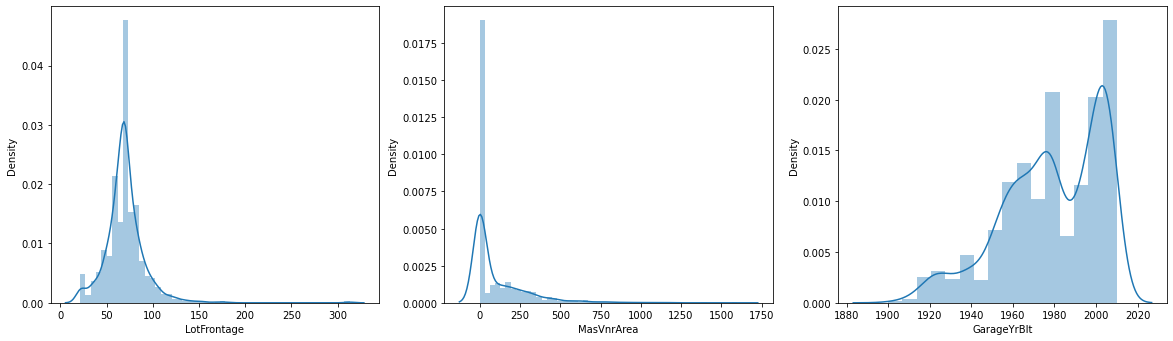

In [7]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.distplot(housing['LotFrontage'])
plt.subplot(2,3,2)
sns.distplot(housing['MasVnrArea'])
plt.subplot(2,3,3)
sns.distplot(housing['GarageYrBlt'])


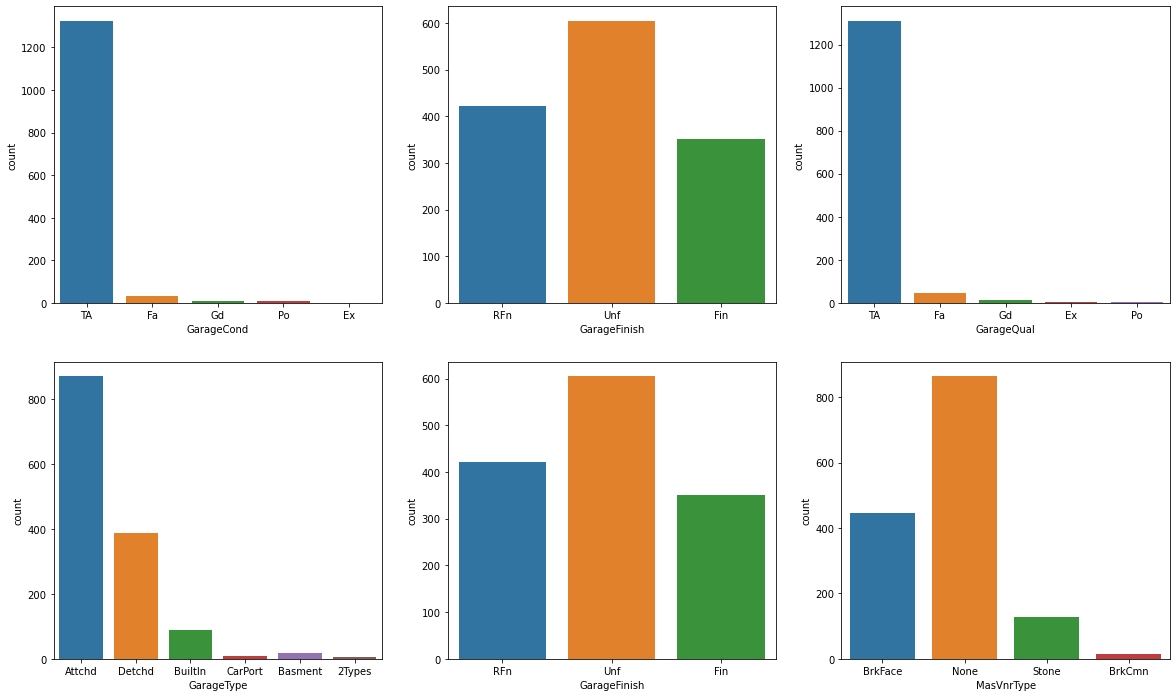

In [8]:
# Visualzing the variables (missing values)

plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.countplot(x='GarageCond', data=housing)

plt.subplot(2,3,2)
sns.countplot(x='GarageFinish', data=housing)

plt.subplot(2,3,3)
sns.countplot(x='GarageQual', data=housing)

plt.subplot(2,3,4)
sns.countplot(x='GarageType', data=housing)

plt.subplot(2,3,5)
sns.countplot(x='GarageFinish', data=housing)

plt.subplot(2,3,6)
sns.countplot(x='MasVnrType', data=housing)

plt.show()

In [9]:
# Houses with no garage have null values replacing it with "no garage"

housing['GarageType'] = housing['GarageType'].replace(np.nan, 'no garage')
housing['GarageFinish']=housing['GarageFinish'].replace(np.nan, 'no garage')
housing['GarageCond']=housing['GarageCond'].replace(np.nan, 'no garage')
housing['GarageQual']=housing['GarageQual'].replace(np.nan, 'no garage')

#Replacing nan with none and SBrkr
housing['MasVnrType']=housing['MasVnrType'].replace(np.nan, 'none')
housing['Electrical']=housing['Electrical'].replace(np.nan, 'SBrkr')


In [10]:
#Changing num to categorical to make dummy variables
housing['MSSubClass']=housing['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

housing['OverallQual']=housing['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

In [11]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


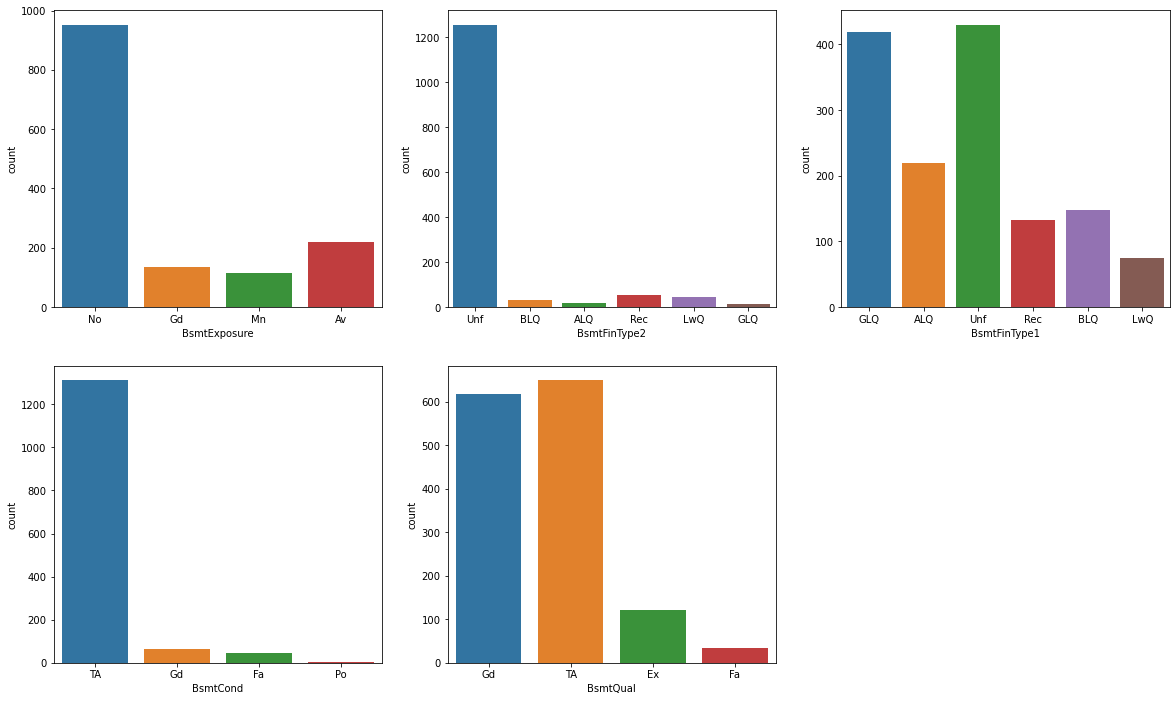

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtExposure', data = housing)

plt.subplot(2,3,2)
sns.countplot(x = 'BsmtFinType2',  data = housing)

plt.subplot(2,3,3)
sns.countplot(x = 'BsmtFinType1', data = housing)
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtCond', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtQual',  data = housing)

plt.show()

In [13]:
# Houses with no basement so replacing values with "no basement"

housing['BsmtExposure'] = housing['BsmtExposure'].replace(np.nan, 'no basement')
housing['BsmtFinType1'] = housing['BsmtFinType1'].replace(np.nan, 'no basement')
housing['BsmtFinType2'] = housing['BsmtFinType2'].replace(np.nan, 'no basement')
housing['BsmtCond'] = housing['BsmtCond'].replace(np.nan, 'no basement')
housing['BsmtQual'] = housing['BsmtQual'].replace(np.nan, 'no basement')

In [14]:
#checking for missing values
missing = (housing.isnull().sum()/housing.isnull().count()*100).sort_values(ascending=False)
missing.head(15)

Id              0.0
FullBath        0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
HalfBath        0.0
BsmtHalfBath    0.0
MSSubClass      0.0
BsmtFullBath    0.0
GrLivArea       0.0
LowQualFinSF    0.0
2ndFlrSF        0.0
dtype: float64

## No more missing values

In [15]:
#checking the dependent variable (SalePrice)
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

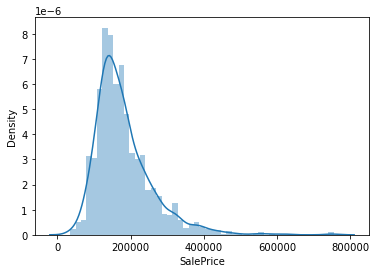

In [16]:
# skewed
sns.distplot(housing['SalePrice'])

In [17]:
#Skewness and Kurtosis
print("skewness : %f" %housing['SalePrice'].skew())

skewness : 1.882876


In [18]:
housing['SalePrice']= np.log(housing.SalePrice)

In [19]:
housing['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

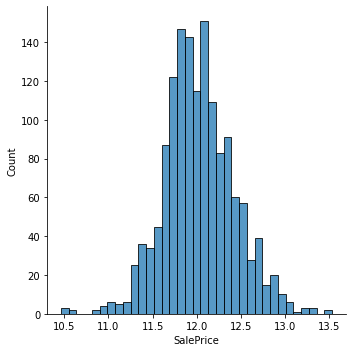

In [20]:
#normall distributed
sns.displot(housing['SalePrice'])

In [21]:
print("skewness : %f" %housing['SalePrice'].skew())

skewness : 0.121335


## Dependent variable (SalePrice) is normally distributed




# EDA

## Checking all categorical columns and their effect on price

In [22]:
cat = housing.select_dtypes(include=['object'])
cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

### Grouping random columns and visualizing them on countplot graph
### Checking their effect on dependent variable

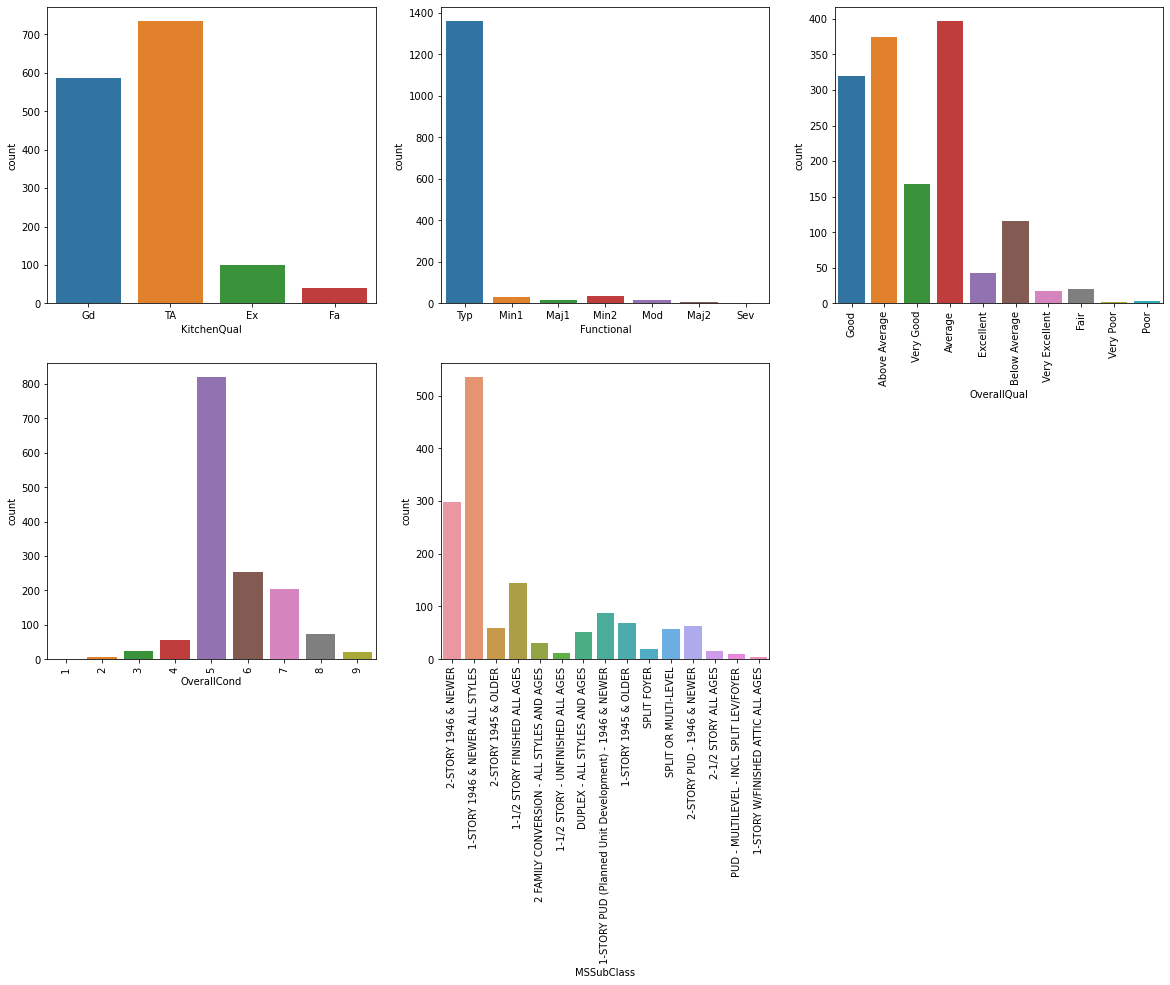

In [23]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.countplot(x = 'KitchenQual', data=housing)
plt.subplot(2,3,2)
sns.countplot(x = 'Functional', data=housing)
plt.subplot(2,3,3)
sns.countplot(x = 'OverallQual', data=housing)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'OverallCond', data=housing)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.countplot(x = 'MSSubClass', data=housing)
plt.xticks(rotation=90)

plt.show()

In [24]:
#checking other columns for skeweness
housing['MSSubClass'].value_counts()

1-STORY 1946 & NEWER ALL STYLES                          536
2-STORY 1946 & NEWER                                     299
1-1/2 STORY FINISHED ALL AGES                            144
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     87
1-STORY 1945 & OLDER                                      69
2-STORY PUD - 1946 & NEWER                                63
2-STORY 1945 & OLDER                                      60
SPLIT OR MULTI-LEVEL                                      58
DUPLEX - ALL STYLES AND AGES                              52
2 FAMILY CONVERSION - ALL STYLES AND AGES                 30
SPLIT FOYER                                               20
2-1/2 STORY ALL AGES                                      16
1-1/2 STORY - UNFINISHED ALL AGES                         12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   10
1-STORY W/FINISHED ATTIC ALL AGES                          4
Name: MSSubClass, dtype: int64

In [25]:
#Dropping highly skewed columns
housing.drop(['Functional'], axis=1, inplace=True)

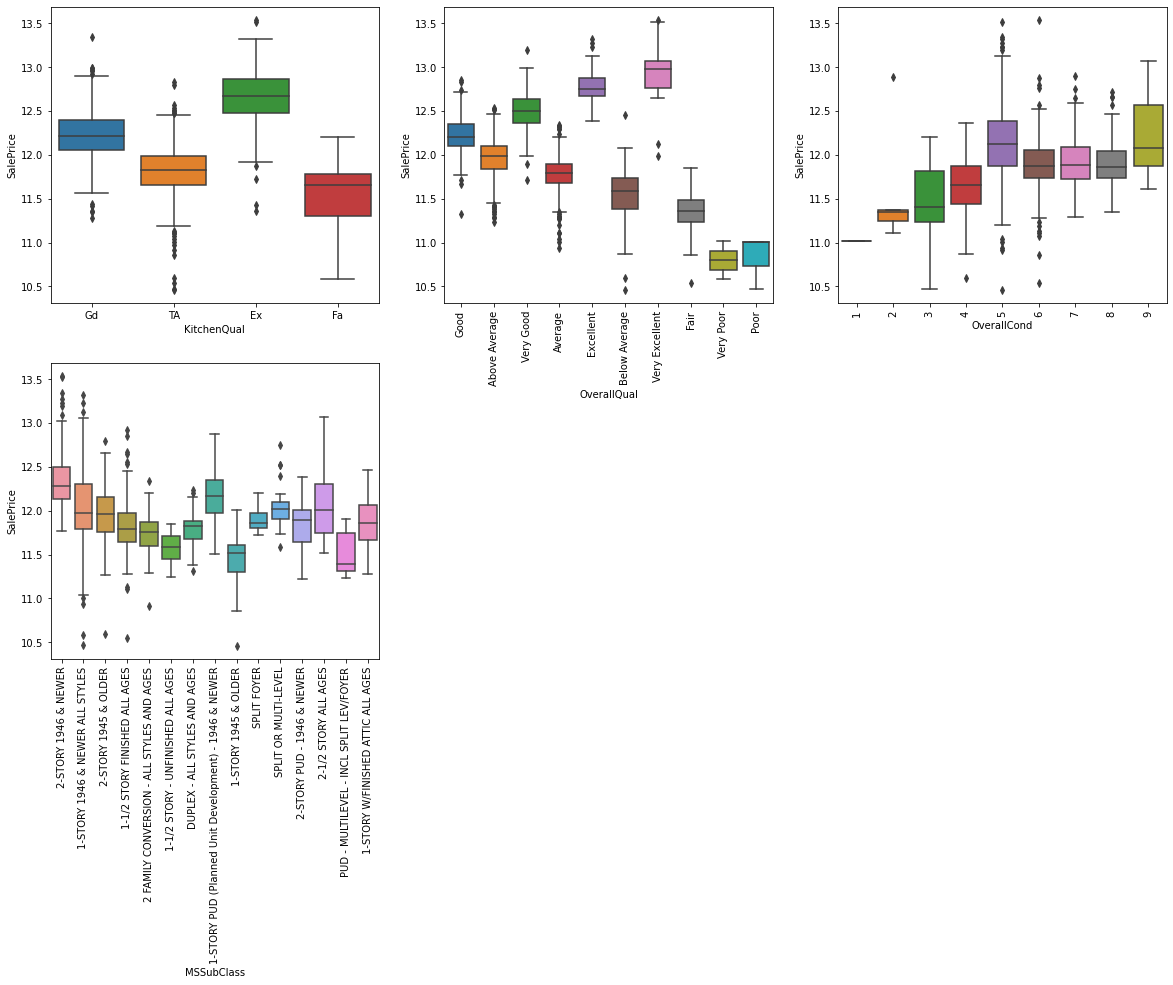

In [26]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x = 'KitchenQual', y='SalePrice', data=housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'OverallQual',y='SalePrice', data=housing)
plt.xticks(rotation=90)
plt.subplot(2,3,3)
sns.boxplot(x = 'OverallCond',y='SalePrice', data=housing)
plt.xticks(rotation=90)

plt.subplot(2,3,4)
sns.boxplot(x = 'MSSubClass',y='SalePrice', data=housing)
plt.xticks(rotation=90)

plt.show()

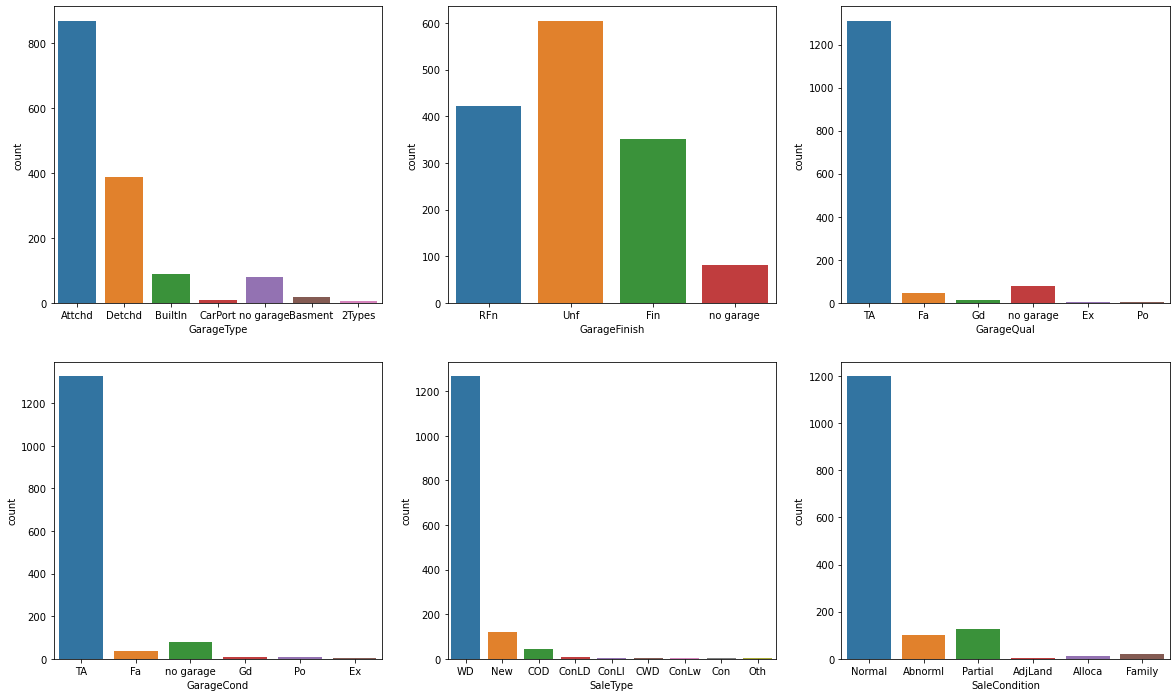

In [27]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageType',  data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish', data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = housing)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageCond', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'SaleType',  data = housing)
plt.subplot(2,3,6)
sns.countplot(x = 'SaleCondition', data = housing)
plt.show()

In [28]:
#checking for skeweness
housing['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

➼ MOST OF COLUMNS ARE HIGHLY SKEWED SO DROPPING THEM AND KEEPING 'GarageType'

In [29]:
housing['GarageType']=housing['GarageType'].replace(['Basement','Carport','2Types'],'Others')
housing['SaleCondition']=housing['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others')

housing.drop(['GarageQual','GarageCond','SaleType'],axis=1,inplace=True)

<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

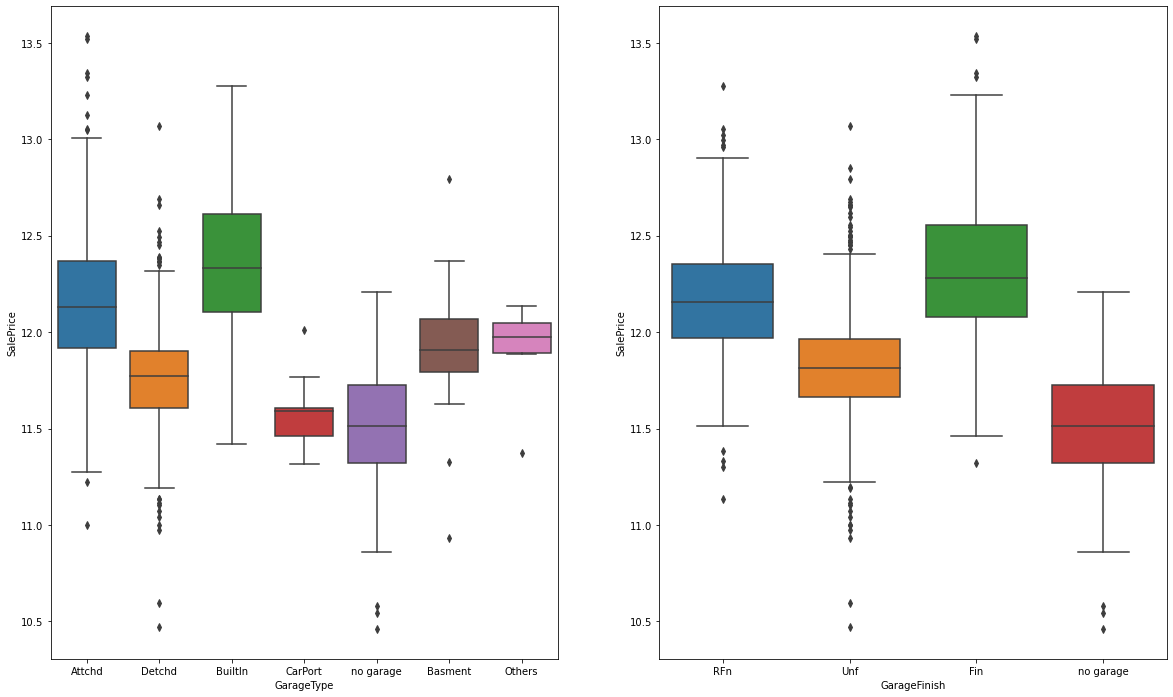

In [30]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxplot(x='GarageType', y='SalePrice', data=housing)
plt.subplot(1,2,2)
sns.boxplot(x='GarageFinish', y='SalePrice', data=housing)


➼ Price of 'GarageType' and 'GarageFinish' is the highest

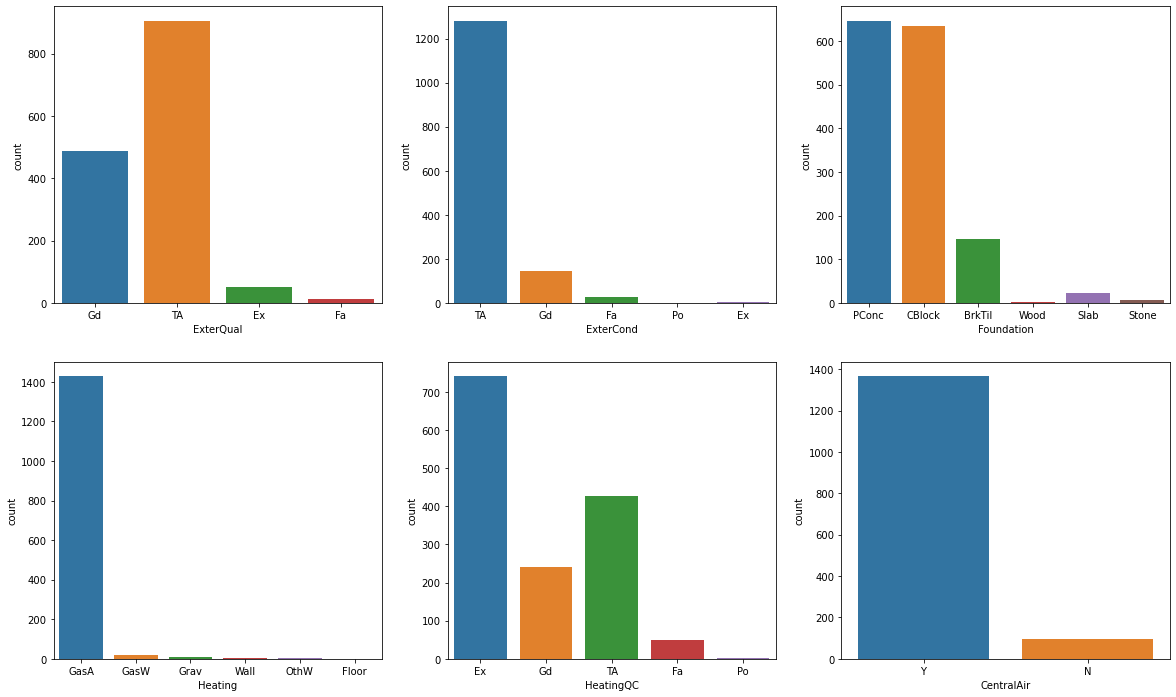

In [31]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'ExterQual',  data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'ExterCond', data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'Foundation', data = housing)
plt.subplot(2,3,4)
sns.countplot(x = 'Heating', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'HeatingQC',  data = housing)
plt.subplot(2,3,6)
sns.countplot(x = 'CentralAir', data = housing)
plt.show()

➡ Majority of ExterQual, ExerCond is TA
➡ Poured Contrete foundation are the highest in number
➡ Variables like Heating, Central Airand Exter Cond are skewed so would be dropping these variables

In [32]:
housing['HeatingQC'].value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [33]:
housing['Foundation'] = housing['Foundation'].replace(['Slab','Stone','Wood'],'Others')

#dropping highly skewed column
housing.drop(['CentralAir','Heating','ExterCond'], axis=1,inplace=True)

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

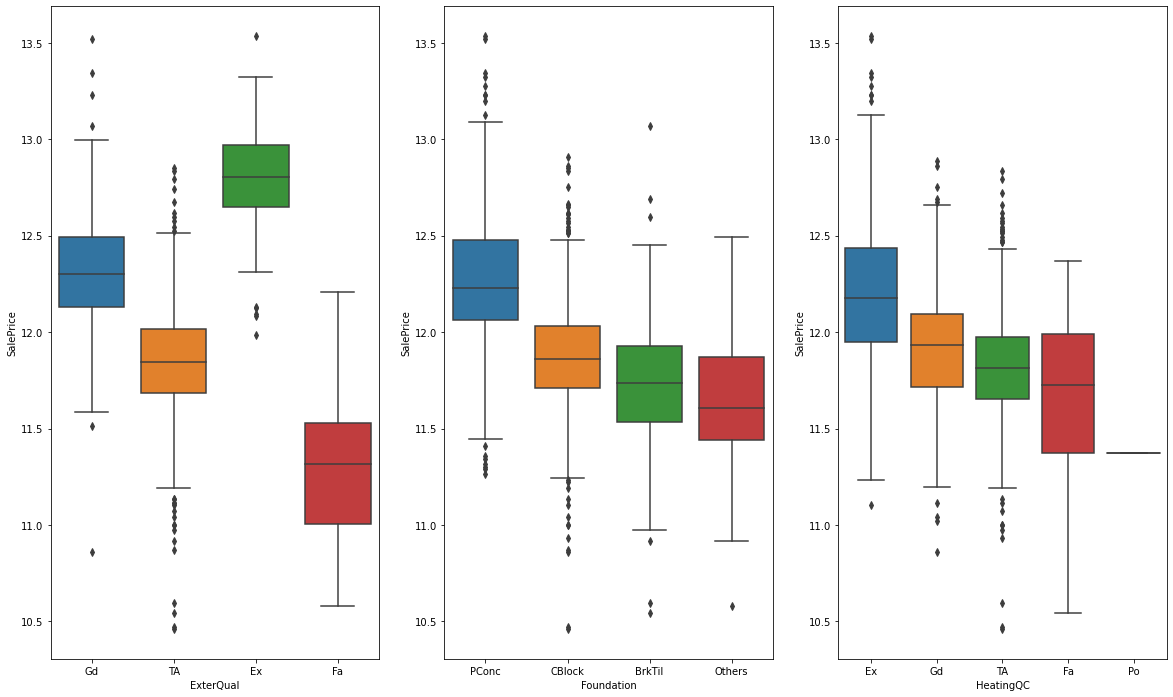

In [34]:
plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.boxplot(x = 'ExterQual', y ='SalePrice', data = housing)
plt.subplot(1,3,2)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = housing)
plt.subplot(1,3,3)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = housing)

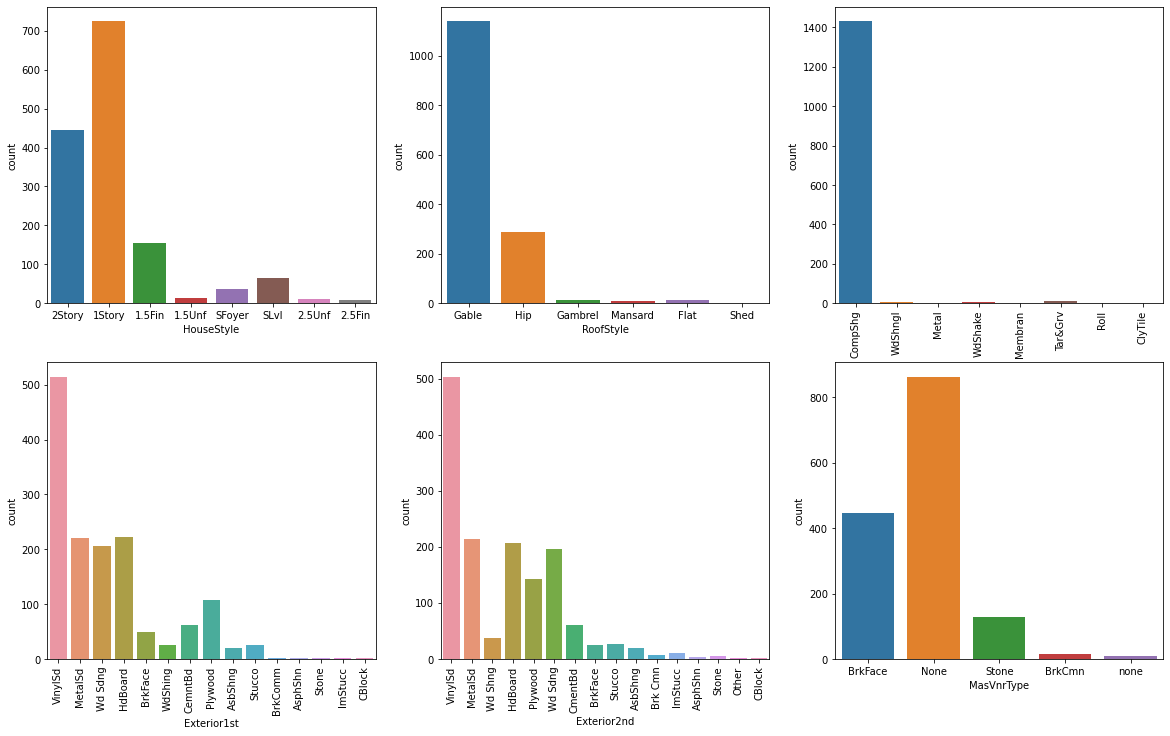

In [35]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'HouseStyle',  data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'RoofStyle', data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'RoofMatl', data = housing)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Exterior1st', data = housing)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.countplot(x = 'Exterior2nd',  data = housing)
plt.xticks(rotation=90)
plt.subplot(2,3,6)
sns.countplot(x = 'MasVnrType', data = housing)
plt.show()

In [36]:
housing['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [37]:
housing['HouseStyle']=housing['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')
housing['RoofStyle']=housing['RoofStyle'].replace(['Shed','Mansard','Gambrel','Flat'],'Others')
housing['Exterior1st']=housing['Exterior1st'].replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],'Others')
housing['Exterior2nd'] = housing['Exterior2nd'].replace(['Other','AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','BrkFace'],'Others')

housing.drop(['RoofMatl'],axis=1,inplace=True)

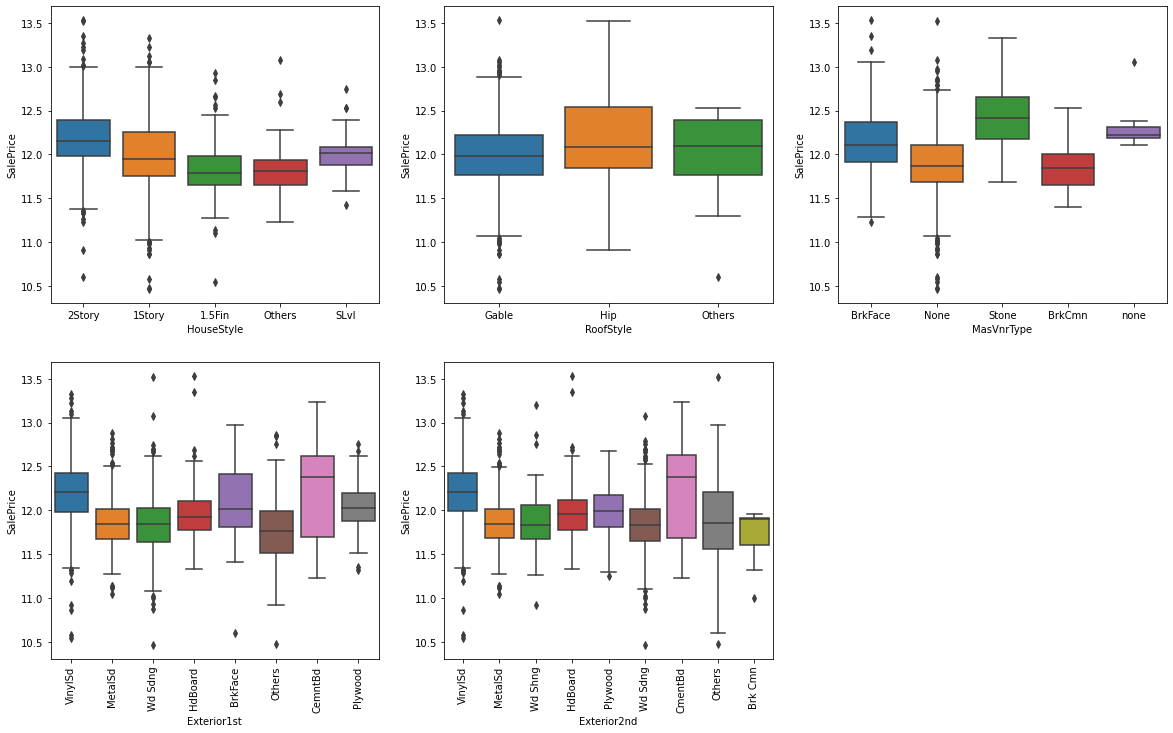

In [38]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'HouseStyle', y ='SalePrice', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = housing)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = housing)
plt.xticks(rotation=90)
plt.show()


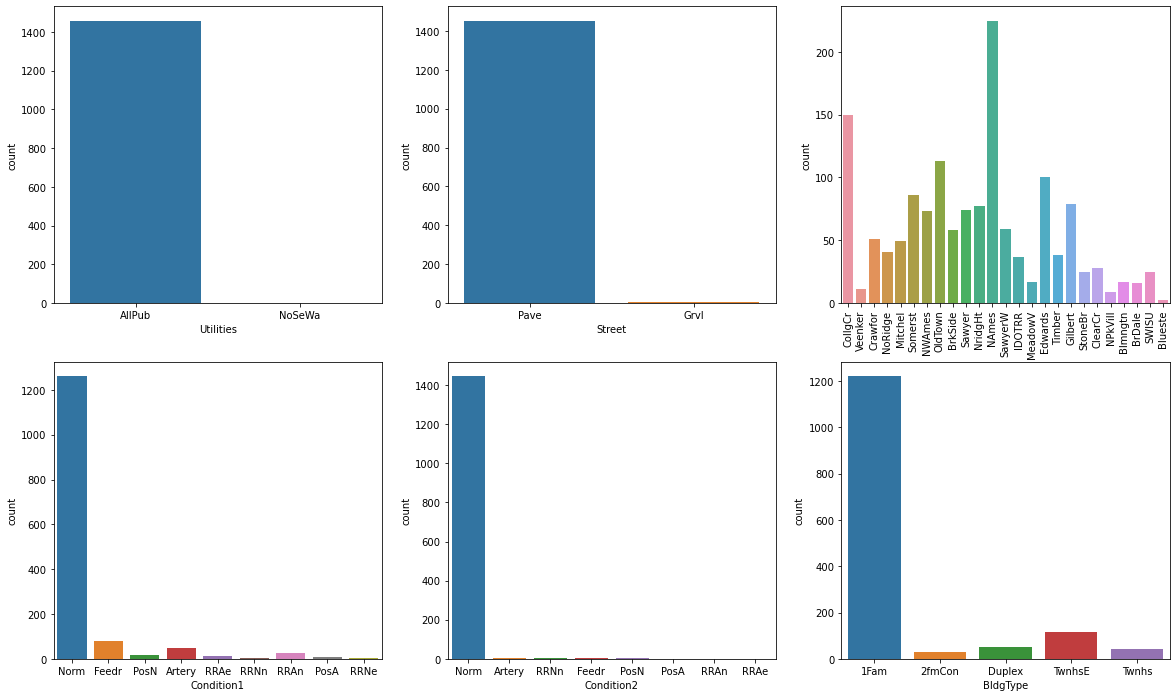

In [39]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'Utilities',  data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'Street', data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'Neighborhood', data = housing)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Condition1', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'Condition2',  data = housing)
plt.subplot(2,3,6)
sns.countplot(x = 'BldgType', data = housing)
plt.show()

In [40]:
housing['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [41]:
housing.drop(['Utilities','Street','Condition1','Condition2'],axis=1,inplace=True)


<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

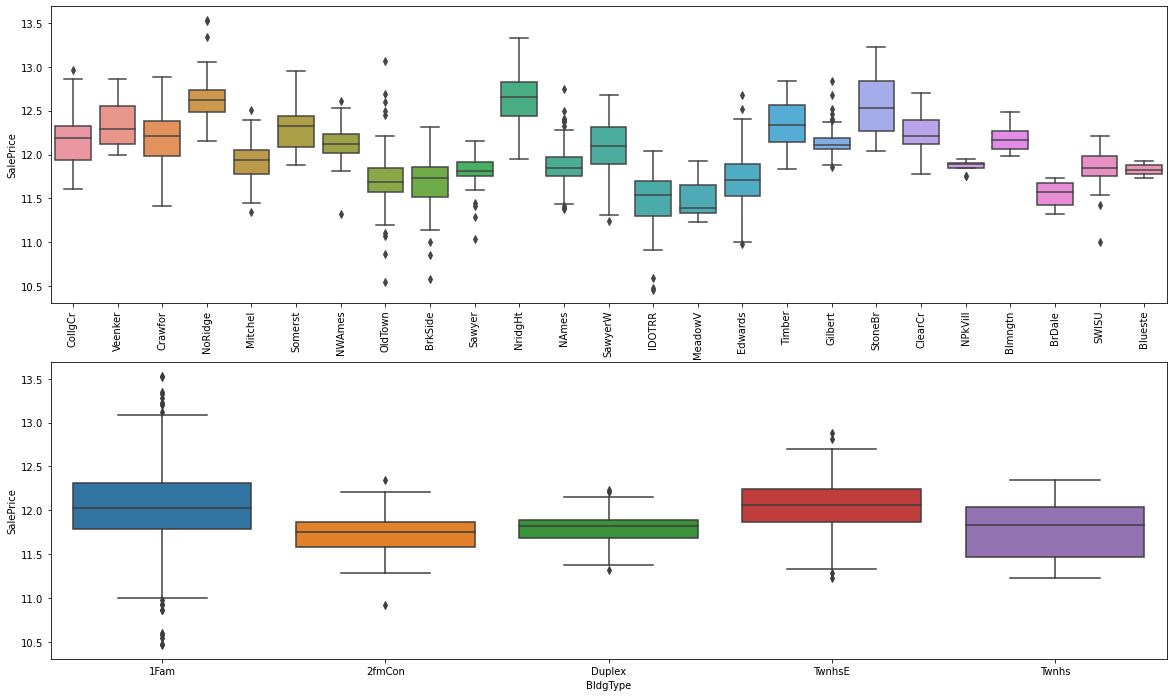

In [42]:
plt.figure(figsize=(20, 12))
plt.subplot(2,1,1)
sns.boxplot(x = 'Neighborhood', y ='SalePrice', data = housing)
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = housing)

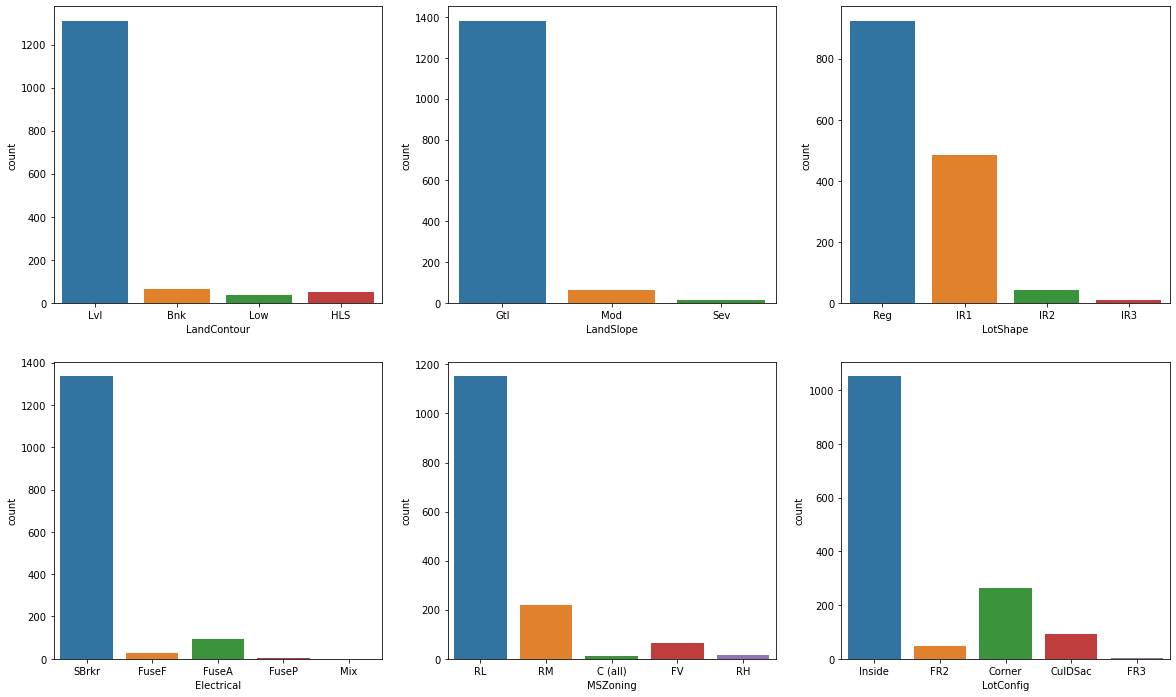

In [43]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'LandContour',  data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'LandSlope', data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'LotShape', data = housing)
plt.subplot(2,3,4)
sns.countplot(x = 'Electrical', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'MSZoning',  data = housing)
plt.subplot(2,3,6)
sns.countplot(x = 'LotConfig', data = housing)
plt.show()


In [44]:
housing['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [45]:
housing.drop(['LandSlope','LandContour','Electrical'],axis=1,inplace=True)

housing['MSZoning'] = housing['MSZoning'].replace(['RH','C (all)'],'Others')

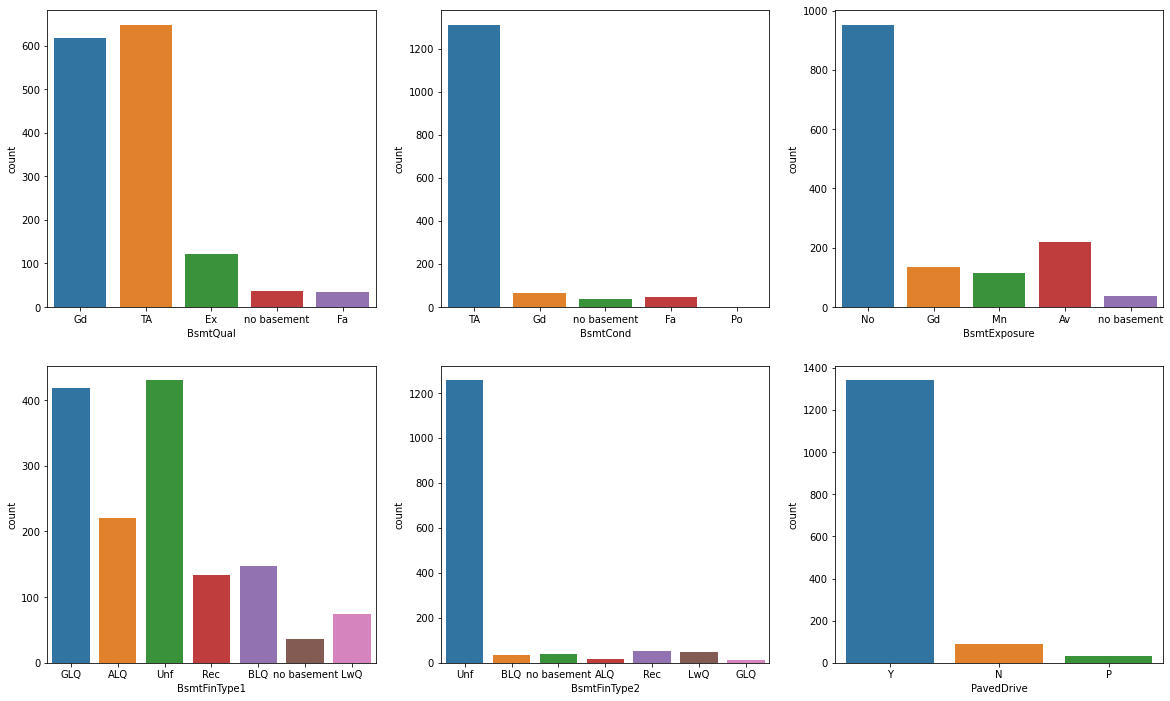

In [46]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtQual',  data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'BsmtCond', data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'BsmtExposure', data = housing)
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtFinType1', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtFinType2',  data = housing)
plt.subplot(2,3,6)
sns.countplot(x = 'PavedDrive', data = housing)
plt.show()

In [47]:
housing['BsmtCond'].value_counts()

TA             1311
Gd               65
Fa               45
no basement      37
Po                2
Name: BsmtCond, dtype: int64

In [48]:
housing.drop(['BsmtFinType2','PavedDrive','BsmtCond'],axis=1,inplace=True)
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,Good,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,Normal,12.247694
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,Above Average,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,Normal,12.109011
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,Good,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,Normal,12.317167
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,Good,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,Abnorml,11.849398
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,Very Good,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,Normal,12.429216


In [49]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   object 
 11  OverallCond    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1460 non-null   object 
 18  MasVnrAr

➼ SALE PRICE CORRELATION MATRIX

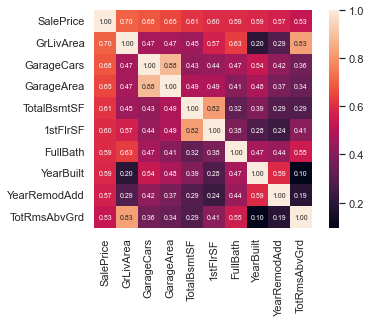

In [50]:
cmap = housing.corr()
k=10
cols = cmap.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1)
hmap=sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [51]:
#feature engineering
housing['YearSinceRemodel'] = 2010 - ((housing['YearRemodAdd'] - housing['YearBuilt']) + housing['YearBuilt'])

In [52]:
#checking all categorical columns to form dummy variables

Cav = housing.select_dtypes(include=['object']) 
Cav.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SaleCondition'],
      dtype='object')

In [53]:
# DUMMY VARIABLES
Cav = pd.get_dummies(Cav,drop_first=True)
print(Cav.shape)

(1460, 125)


In [54]:
Cav.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,...,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_no basement,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_no basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_no basement,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Others,GarageType_no garage,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_no garage,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


In [55]:
# concatenate dummy variables with main dataset
housing = pd.concat([housing,Cav], axis=1)
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,...,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_no basement,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_no basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_no basement,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Others,GarageType_no garage,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_no garage,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,Good,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,Above Average,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,Good,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,0,42,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,Good,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,0,35,272,...,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,Very Good,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,192,84,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


In [56]:
housing.drop(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish',
       'SaleCondition','Id','OverallCond','MSSubClass','OverallQual'],axis=1,inplace=True) #removing columns as dummy variables already formed
housing.head()


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,YearSinceRemodel,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,...,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_no basement,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_no basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_no basement,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Others,GarageType_no garage,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_no garage,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247694,7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109011,34,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317167,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,11.849398,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,12.429216,10,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


In [57]:
housing.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1 , inplace=True) 
housing.head()


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearSinceRemodel,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,...,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_no basement,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_no basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_no basement,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Others,GarageType_no garage,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_no garage,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,12.247694,7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,12.109011,34,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,12.317167,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,11.849398,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,12.429216,10,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


In [58]:
# Putting feature variable to X
X = housing.drop(['SalePrice'], axis=1)

X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearSinceRemodel,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_no basement,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_no basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_no basement,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Others,GarageType_no garage,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_no garage,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,34,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,10,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


In [59]:
# Putting response variable to y
y = housing['SalePrice']

y.head()


0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, 
                                                    random_state=100)


In [61]:
scaler = StandardScaler()

X_train[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']] = scaler.fit_transform(X_train[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']])


In [62]:
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearSinceRemodel,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_no basement,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_no basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_no basement,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Others,GarageType_no garage,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_no garage,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
210,-0.115302,-0.473765,-0.558025,0.043512,-0.293313,-0.374367,-0.430911,-0.765065,-0.787597,-0.124502,-1.228053,1.066863,-0.247791,-1.026085,-0.751723,-1.042717,-0.234155,-0.935650,-0.925422,-2.366798,-2.217786,-0.743160,-0.709347,1.150231,-0.121922,-0.275126,-0.062302,-0.084263,4,60,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0
318,0.926898,-0.056845,0.809137,1.160345,-0.293313,-0.454644,0.621579,0.511914,2.140556,-0.124502,2.123103,1.066863,-0.247791,0.786428,1.246998,1.396261,-0.234155,1.556976,0.623522,1.645101,0.867506,1.989482,0.197980,1.910043,-0.121922,-0.275126,-0.062302,-0.084263,4,17,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
239,-0.794998,-0.169324,-0.558025,-0.761296,-0.293313,0.171964,-0.712011,-0.930972,0.795996,-0.124502,-0.056465,-0.837450,-0.247791,-1.026085,1.246998,0.176772,-0.234155,0.310663,0.623522,-1.029498,-1.183084,-0.743160,1.407748,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,4,60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
986,-0.477806,-0.502297,-0.558025,-0.963574,-0.293313,-0.175904,-1.256778,-0.420683,0.669584,-0.124502,0.221858,-0.837450,-0.247791,-1.026085,-0.751723,-1.042717,-0.234155,-0.935650,-0.925422,-1.029498,-1.018473,2.423490,-0.709347,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,6,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
1416,-0.432493,0.082905,-0.558025,-0.963574,-0.293313,0.475233,-0.620490,0.195183,1.611926,-0.124502,1.453624,-0.837450,-0.247791,0.786428,-0.751723,1.396261,4.112612,2.803289,-0.925422,0.307802,0.416000,-0.743160,-0.709347,1.435160,-0.121922,-0.275126,-0.062302,-0.084263,4,60,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0


In [63]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 210 to 79
Columns: 155 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(28), int64(2), uint8(125)
memory usage: 371.9 KB


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, 
                                                    random_state=100)


# Model Building and Evaluation

### Ridge and Lasso Regression

## Ridge

In [65]:
# list of alphas to tune
params = {'alpha': [0.00004,0.0001, 0.001, 0.01, 0.1, 10,100,1000]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [4e-05, 0.0001, 0.001, 0.01, 0.1, 10, 100,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [66]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010726,0.009100,0.006260,0.007666,0.00004,{'alpha': 4e-05},0.869474,0.776337,0.826609,0.886454,0.884999,0.848775,0.042188,5,0.918043,0.930038,0.926550,0.913823,0.912808,0.920252,0.006886
1,0.012633,0.006319,0.003124,0.006248,0.0001,{'alpha': 0.0001},0.869475,0.776337,0.826609,0.886461,0.885004,0.848777,0.042190,4,0.918043,0.930038,0.926550,0.913823,0.912808,0.920252,0.006886
2,0.011373,0.006088,0.013701,0.003846,0.001,{'alpha': 0.001},0.869480,0.776342,0.826604,0.886567,0.885075,0.848813,0.042220,3,0.918043,0.930038,0.926550,0.913823,0.912808,0.920252,0.006886
3,0.015789,0.000184,0.015693,0.001136,0.01,{'alpha': 0.01},0.869534,0.776386,0.826551,0.887481,0.885758,0.849142,0.042498,2,0.918042,0.930036,0.926548,0.913822,0.912804,0.920250,0.006886
4,0.017241,0.003216,0.014205,0.003083,0.1,{'alpha': 0.1},0.870060,0.776443,0.826017,0.891269,0.890806,0.850919,0.044164,1,0.917965,0.929903,0.926450,0.913752,0.912576,0.920129,0.006898


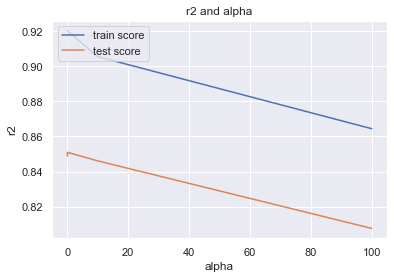

In [67]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [68]:
# Optimum alpha
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-4.67322629e-04,  1.63302100e-06,  2.40314386e-06,  4.24205567e-06,
        8.73301321e-06,  1.08675496e-05,  2.38426195e-05,  8.00703237e-05,
        1.13534064e-04, -8.05641120e-05,  1.13040273e-04,  3.94781009e-02,
        1.87815144e-02,  4.51566000e-02,  3.23589352e-02,  8.87710462e-03,
       -8.08821931e-02,  9.52441867e-03,  3.86849279e-02,  4.75836296e-02,
        4.26922157e-05,  1.11272700e-04, -5.28550878e-05,  1.15605866e-04,
        2.06301323e-04,  2.40526215e-04, -4.21962714e-04, -2.93137711e-06,
        2.47673088e-04, -2.10190274e-03,  1.53318163e-02, -8.57263202e-02,
        5.33383564e-02,  4.25340041e-03,  6.34642885e-03, -1.37076756e-02,
        2.04715136e-02,  3.02061772e-02, -5.84553825e-03, -4.69863909e-02,
        1.15066021e-02, -3.04952176e-02,  2.31235072e-02,  1.32387518e-02,
       -8.59847796e-02,  1.71408484e-02, -1.95072065e-02,  1.87502672e-02,
       -5.84065415e-02,  5.47838889e-03,  3.83187867e-02, -3.46407021e-02,
       -1.40085016e-02, -

In [69]:
ridge.score(X_train,y_train)

0.9026526695616006

In [70]:
ridge.score(X_test,y_test)

0.8633649318526209

➼ Ridge model parameter

In [71]:
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.562),
 ('LotFrontage', -0.098),
 ('LotArea', -0.093),
 ('MasVnrArea', -0.086),
 ('BsmtFinSF1', -0.086),
 ('BsmtFinSF2', -0.085),
 ('BsmtUnfSF', -0.082),
 ('TotalBsmtSF', -0.081),
 ('1stFlrSF', -0.068),
 ('2ndFlrSF', -0.067),
 ('LowQualFinSF', -0.062),
 ('GrLivArea', -0.06),
 ('BsmtFullBath', -0.059),
 ('BsmtHalfBath', -0.058),
 ('FullBath', -0.058),
 ('HalfBath', -0.054),
 ('BedroomAbvGr', -0.054),
 ('KitchenAbvGr', -0.054),
 ('TotRmsAbvGrd', -0.053),
 ('Fireplaces', -0.052),
 ('GarageCars', -0.051),
 ('GarageArea', -0.05),
 ('WoodDeckSF', -0.05),
 ('OpenPorchSF', -0.048),
 ('EnclosedPorch', -0.047),
 ('3SsnPorch', -0.046),
 ('ScreenPorch', -0.043),
 ('PoolArea', -0.042),
 ('MiscVal', -0.038),
 ('MoSold', -0.036),
 ('YearSinceRemodel', -0.035),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.033),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.031),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.03),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', -

## Lasso


In [72]:
params = {'alpha': [0.00006,0.0006, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008 ]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [6e-05, 0.0006, 0.0008, 0.001, 0.002, 0.004,
                                   0.006, 0.008]},
             return_train_score=True, scoring='r2', verbose=1)

In [73]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.068375,0.023453,0.003392,0.000798,0.00006,{'alpha': 6e-05},0.872055,0.775594,0.827116,0.894697,0.891727,0.852238,0.045300,1,0.917288,0.928994,0.925738,0.913260,0.911564,0.919369,0.006867
1,0.029526,0.020565,0.002394,0.000798,0.0006,{'alpha': 0.0006},0.882924,0.727123,0.818227,0.894420,0.899833,0.844506,0.065571,2,0.904630,0.916170,0.913797,0.901587,0.897271,0.906691,0.007202
2,0.018055,0.003761,0.002992,0.000892,0.0008,{'alpha': 0.0008},0.882764,0.711753,0.816055,0.892482,0.898353,0.840281,0.070722,3,0.899157,0.912037,0.909682,0.896696,0.891414,0.901797,0.007846
3,0.012669,0.002633,0.002394,0.000798,0.001,{'alpha': 0.001},0.882451,0.699371,0.813110,0.889853,0.894489,0.835855,0.074391,4,0.893785,0.908213,0.905256,0.891325,0.884879,0.896692,0.008751
4,0.009278,0.001931,0.002793,0.000746,0.002,{'alpha': 0.002},0.876778,0.647080,0.798490,0.877949,0.878983,0.815856,0.089821,5,0.873083,0.894631,0.885625,0.872233,0.864978,0.878110,0.010599


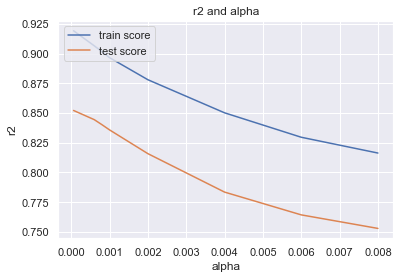

In [74]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')

plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [75]:
#optimum alpha

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [76]:
lasso.coef_

array([-3.48907303e-04,  1.48170727e-06,  1.34628450e-05,  4.69552219e-05,
        4.04002967e-05,  4.41752186e-05,  2.59037643e-05,  1.76577588e-04,
        1.99707010e-04, -1.29470748e-05,  2.39425879e-05,  3.58232655e-02,
        8.80701187e-04,  3.93999444e-02,  2.69214921e-02,  1.46729008e-03,
       -1.04268743e-01,  1.02163168e-02,  3.96665711e-02,  5.44336108e-02,
        4.36926176e-05,  1.20543904e-04, -4.54486198e-05,  1.16107931e-04,
        1.93999992e-04,  2.59125116e-04, -4.80630848e-04, -4.04675413e-06,
        1.03877222e-04, -2.43600520e-03,  0.00000000e+00, -1.01790590e-01,
        4.24689100e-02, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -5.53921485e-02,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -9.46611421e-02,  1.19342848e-02, -2.38149299e-02,  0.00000000e+00,
       -3.59952351e-02,  0.00000000e+00,  3.80063840e-02, -0.00000000e+00,
       -0.00000000e+00, -

In [77]:
lasso.score(X_train,y_train)

0.8909410673218903

In [78]:
lasso.score(X_test,y_test)

0.8537541733253877

 ➼lasso model parameters

In [79]:
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list((zip(cols, model_parameters)))

[('constant', 11.493),
 ('LotFrontage', -0.104),
 ('LotArea', -0.102),
 ('MasVnrArea', -0.099),
 ('BsmtFinSF1', -0.095),
 ('BsmtFinSF2', -0.09),
 ('BsmtUnfSF', -0.071),
 ('TotalBsmtSF', -0.064),
 ('1stFlrSF', -0.058),
 ('2ndFlrSF', -0.055),
 ('LowQualFinSF', -0.049),
 ('GrLivArea', -0.047),
 ('BsmtFullBath', -0.042),
 ('BsmtHalfBath', -0.036),
 ('FullBath', -0.036),
 ('HalfBath', -0.035),
 ('BedroomAbvGr', -0.034),
 ('KitchenAbvGr', -0.032),
 ('TotRmsAbvGrd', -0.028),
 ('Fireplaces', -0.024),
 ('GarageCars', -0.022),
 ('GarageArea', -0.022),
 ('WoodDeckSF', -0.021),
 ('OpenPorchSF', -0.019),
 ('EnclosedPorch', -0.017),
 ('3SsnPorch', -0.016),
 ('ScreenPorch', -0.016),
 ('PoolArea', -0.015),
 ('MiscVal', -0.013),
 ('MoSold', -0.012),
 ('YearSinceRemodel', -0.011),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.01),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.01),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.007),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', 

# CONCLUSION
➡ Ridge : train - 90.9, Test - 87.4

➡ Lasso : train - 89.8, Test - 86.4
### We have a decent score for both the regressions. 

# Significant Variables in Ridge are : 

⚫ 'SaleCondition_Partial', 0.143

⚫'SaleCondition_Others', 0.105

⚫'SaleCondition_Normal', 0.099

⚫'GarageFinish_Unf', 0.094

⚫'GarageFinish_RFn', 0.092

# Significant Variables in Lasso are : 

⚫ 'SaleCondition_Partial', 0.198

⚫'SaleCondition_Others',0.12

⚫'SaleCondition_Normal',0.098

⚫'GarageFinish_Unf', 0.084

⚫'GarageFinish_RFn', 0.079

# Optimum values

➡ Optimum Value of lamda for Ridge :10

➡Optimum Value of lamda for Lasso : 0.001

## These variables are directly proportional to each other.


## Feature selection allows us to choose lasso regression in this case.